<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:farzaneh.hatami@ut.ac.ir">Farzaneh Hatami</a><br></font><br>
    </div>
</div>

# EDA and Visualization

## Part1 - EDA and Visualization

1. A quick peek at the data

In [133]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

loading data and observing first lines 

In [134]:
df = pd.read_csv("taxis.csv", index_col=[0])
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


as you can see below we have access to data types and also we can check the number of possible missing values in our data set.

In [135]:
print(df.dtypes)
print("NaN:", df.isna().sum())

pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object
NaN: pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


as you can see the data types are not suitable for memory for example for 'pickup' and 'dropoff' and for 'color' and 'payment' data types are "object" we are going to change theme accordingly to "datatime" and "catagory".

In [136]:
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])
df[['color', 'payment']] = df[['color', 'payment']].astype('category')

2. Number of trips

```
# This is formatted as code
```



as we can see the number of total trips is 6433.

In [137]:
#len(df)
print("the number of total trips : {}".format(df.shape[0]))

the number of total trips : 6433


3. Number of unique pickup-zones

In [138]:
print('the number of unique pickup-zones: {}'.format(df['pickup_zone'].nunique()))

the number of unique pickup-zones: 194


4. Most frequent drop-zones

In [139]:
df["dropoff_zone"].value_counts()

Upper East Side North        245
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East                 176
                            ... 
Bensonhurst East               1
Springfield Gardens South      1
East Flushing                  1
Brighton Beach                 1
Ozone Park                     1
Name: dropoff_zone, Length: 203, dtype: int64

part a_ ploting the top five and down five dropzones

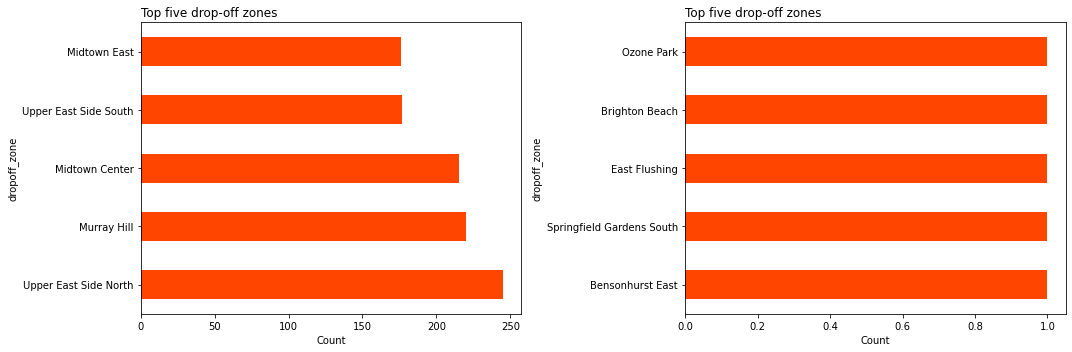

In [140]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df["dropoff_zone"].value_counts()[:5].plot(kind="barh", color="orangered")
plt.title('Top five drop-off zones', loc='left')
plt.xlabel("Count")
plt.ylabel("dropoff_zone")
plt.subplot(1, 2, 2)
df["dropoff_zone"].value_counts()[-5:].plot(kind="barh", color="orangered")
plt.title('Top five drop-off zones', loc='left')
plt.xlabel("Count")
plt.ylabel("dropoff_zone")
plt.tight_layout()
plt.show()

part b
so based on plot we can see that the top drop-off zone is going to be "midtown east" and but for the bottom list we have several candidates considering there are several zones(ozone park- brighton beach and ....) also it can be understood we might have skewness in our data set cosidering the density is somehow not distiributed equally.


5. Percentage of drop-offs and pick-ups per weekday

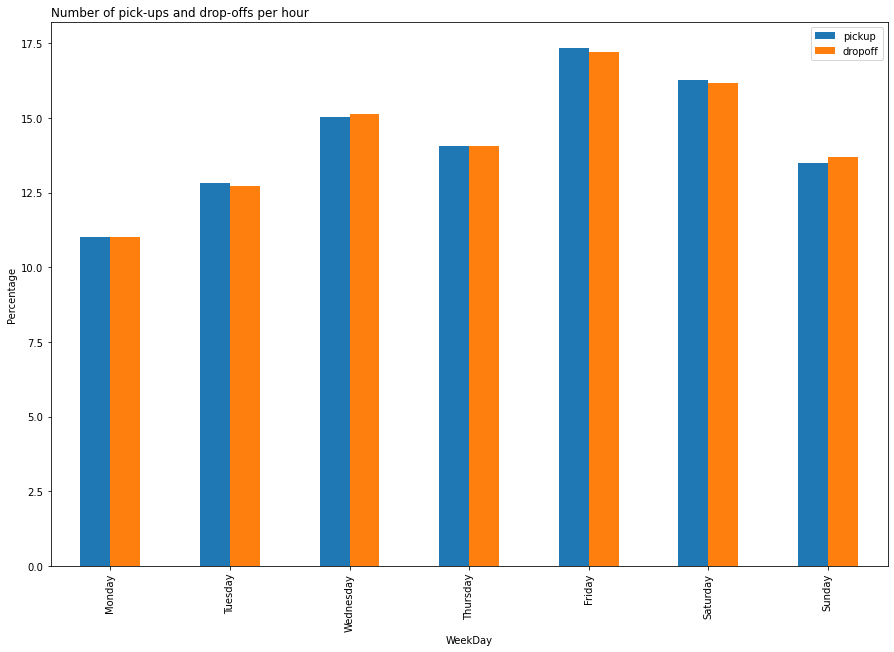

In [141]:
# percentage of drop-offs and pick-ups per weekday
pickup_p = df.groupby(df['pickup'].dt.day_name())['pickup'].count() / df.groupby(df['pickup'].dt.day_name())['pickup'].count().sum() * 100
dropoff_p = df.groupby(df['dropoff'].dt.day_name())['dropoff'].count() / df.groupby(df['dropoff'].dt.day_name())['dropoff'].count().sum() * 100
# a dataset of two features in order to plot the figure
data = pd.DataFrame()
data["pickup"] = pickup_p
data["dropoff"] = dropoff_p
#weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]
data = data.reindex(weekdays)
#plot
data.plot(kind="bar",figsize=(15,10))
plt.title("Number of pick-ups and drop-offs per hour", loc='left')
plt.xlabel("WeekDay")
plt.ylabel("Percentage")
plt.show()

so based on the plot the most transportation is on friday which is acceptable considering the city(and friday is a work day in the middle of the week!) so also we can see correlation between pick-up and dop-off that is logical and the reason they are not the same is that maybe there were some call-offs(trip cancelation).

6. Number of pick-ups and drop-offs per hour of day

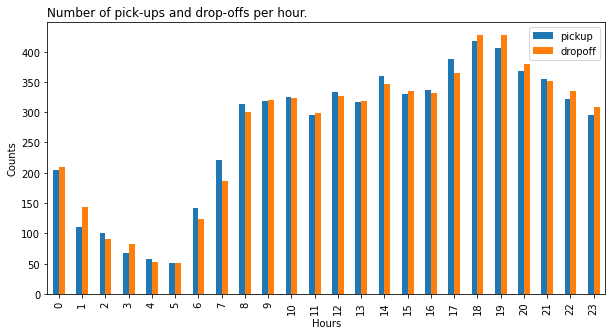

In [142]:
# number of pick-ups and drop-offs
pickup_num = df.groupby(df['pickup'].dt.hour)['pickup'].count()
dropoff_num = df.groupby(df['dropoff'].dt.hour)['dropoff'].count()
# a dataset of two features in order to plot the figure
d = pd.DataFrame()
d["pickup"] = pickup_num
d["dropoff"] = dropoff_num
# Plot
d.plot(kind="bar",figsize=(10, 5))
plt.title('Number of pick-ups and drop-offs per hour.', loc='left')
plt.xlabel("Hours")
plt.ylabel("Counts")
plt.show()

as shown we can observethat most trips happen between 6 am to 19 pm and between 19 pm to 6 am(including midnight) as we axpect, the number of tirps are decreased considering most people are expected to be at home resting.

7.  Most frequents payment per weekday

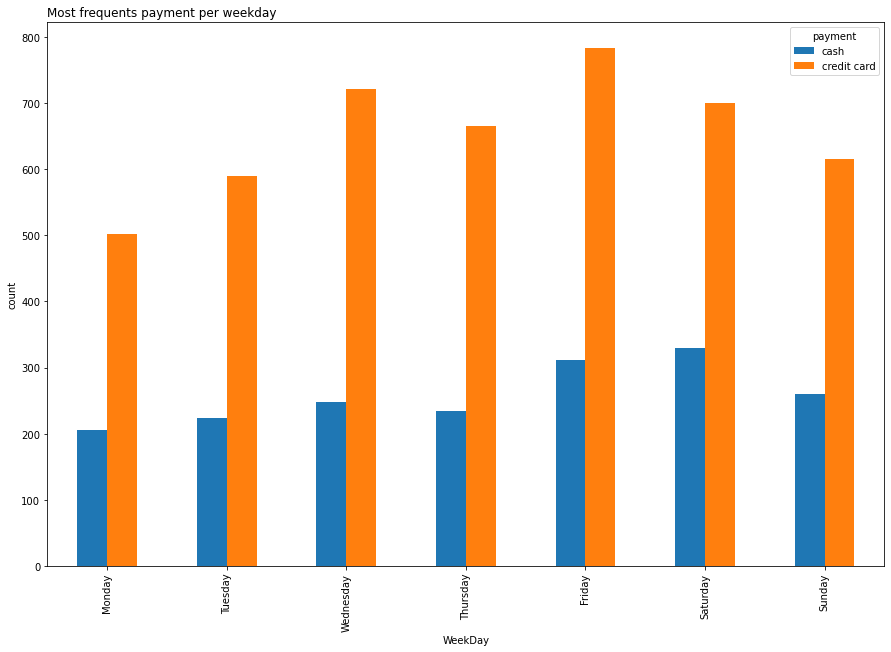

In [143]:
# number of total payments
payment_num = df.groupby([df['dropoff'].dt.day_name(), 'payment'])['payment'].count().unstack()
#weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]
payment_num = payment_num.reindex(weekdays)
# Plot
payment_num.plot(kind="bar",figsize=(15,10))
plt.title("Most frequents payment per weekday", loc='left')
plt.xlabel("WeekDay")
plt.ylabel("count")
plt.show()

generally the usage of credit card is really more common among people with a significant margin, also, the usage of cash increases in weekends which might be due to what more people need.

8. Number of trips per passengers

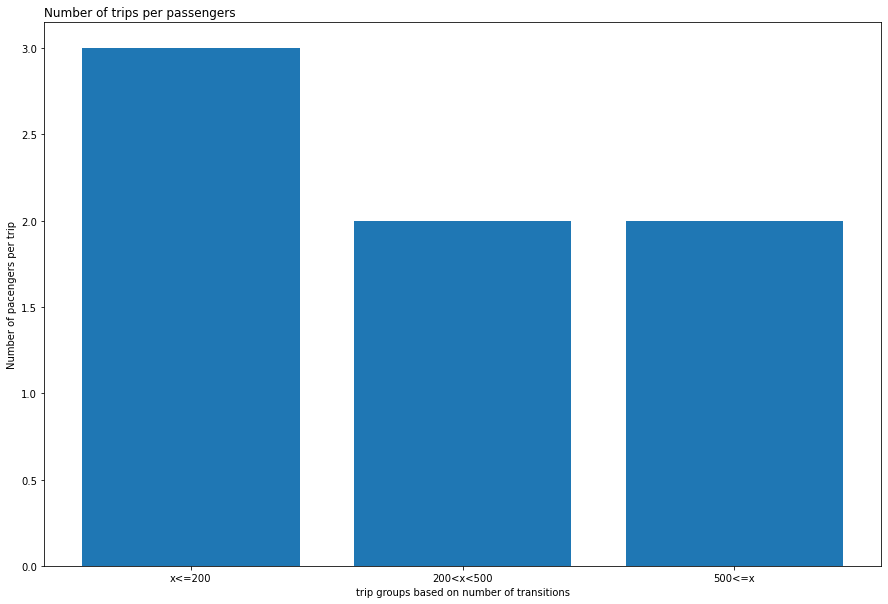

In [144]:
#number of passengers
p_num = pd.DataFrame(df.groupby(["passengers"])["pickup"].count())
# partition based on question
p_num["x<=200"] = p_num["pickup"] <= 200
p_num["200<x<500"] = (p_num["pickup"] > 200) & (p_num["pickup"] < 500)
p_num["500<=x"] = p_num["pickup"] >= 500
# Plot
plt.figure(figsize=(15,10))
plt.bar(["x<=200", "200<x<500", "500<=x"], [p_num["x<=200"].sum(), p_num["200<x<500"].sum(), p_num["500<=x"].sum()])

plt.title("Number of trips per passengers", loc='left')
plt.xlabel("trip groups based on number of transitions")
plt.ylabel("Number of pacengers per trip")
plt.show()

based on number of passengers 3 have less than 200 trips and 2 have accordingly between 200 and 500 trips and more than 500 trips accordingly. most of costumers have tendency to reduce their number of trips by taxi.

9. Number of trips with or without a dropoff-zone

In [145]:
print("number of trips Without a dropoff zone:", df["dropoff_zone"].isna().sum())
print("number of trips With a dropoff zone:", (~df["dropoff_zone"].isna()).sum())

number of trips Without a dropoff zone: 45
number of trips With a dropoff zone: 6388


10.Most frequent color among trips with a dropoff-zone

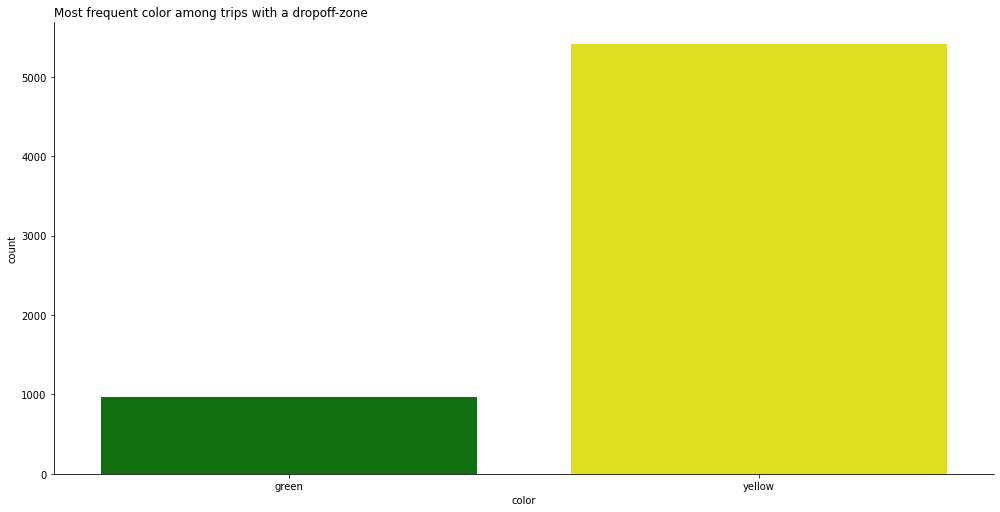

In [146]:
# using libraries
sns.catplot(x="color", kind="count", data=df[~df['dropoff_zone'].isna()], height=7, aspect=2, palette= ['green', 'yellow'])
plt.title('Most frequent color among trips with a dropoff-zone', loc='left')
plt.show()

## Part2 - Dimention Rednction

### Selection

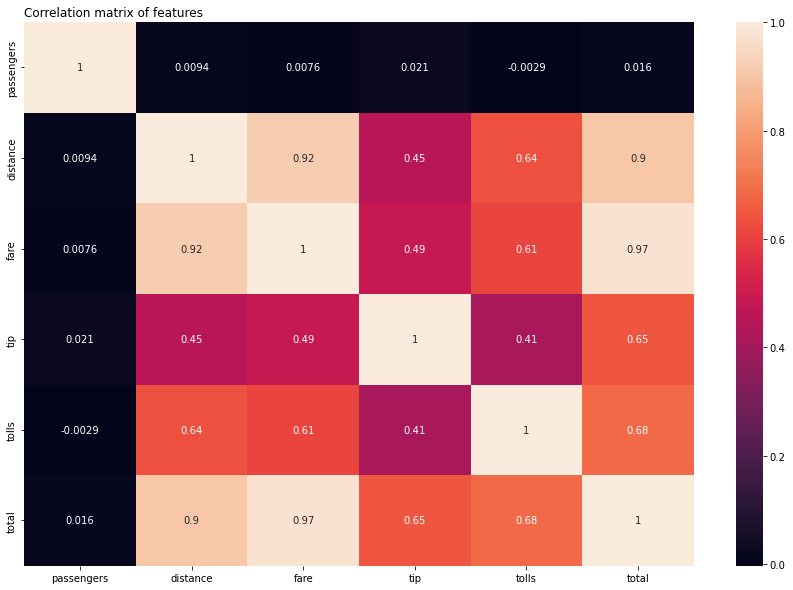

In [147]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(corr, annot=True, ax=ax)
plt.title('Correlation matrix of features', loc='left');

for this case the features that were meant to be comparisoned are being considered and the remains are neglected however we can have common sense that for instance color doesn't give any information about the case. here we can see high correlation between 'distance', 'tip', 'tolls' and 'total'. fare has a high correlation with distance, tolls and tip and less correlation with tip and number of passengers. the result is suitable with common sense since num of passengers has nothing to do with the fare. here we can just use one of (fare, distance and total). so for example we can just use fare, passengers, tip, total.

### PCA

so for the model we just remove fare due to high correlation with other significnat fetures and just use others instead.

In [148]:
# PCA
pca = PCA(n_components=2)


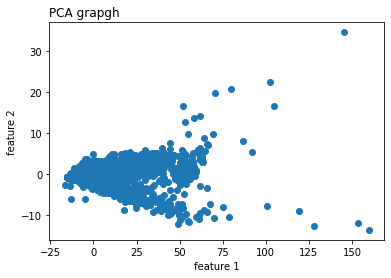

In [149]:
# Plot
#seeing the plot of fets in 2D
fet = pca.fit_transform(df[["passengers", "distance", "tip", "tolls", "total"]])
plt.scatter(fet[:, 0], fet[:, 1])
plt.title("PCA grapgh",loc='left')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

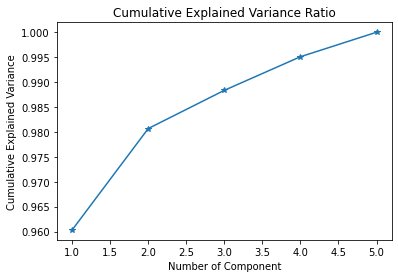

In [155]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fet = pca.fit_transform(df[["passengers", "distance", "tip", "tolls", "total"]])
plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum(), "-*")
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of features")
plt.ylabel("Cumulative Explained Variance percentage")
plt.show()

based on results of variance ratio if we choose n-components=3 we can get an acceaptable result.(close to 99 percent)

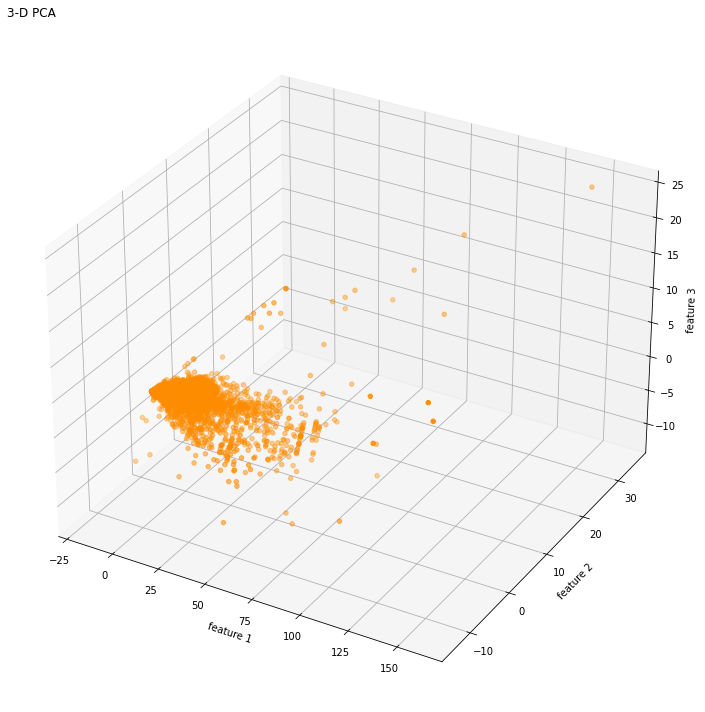

In [162]:
#ploting with new dimensions
pca = PCA(n_components=3)
fet = pca.fit_transform(df[["passengers", "distance", "tip", "tolls", "total"]])

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(fet[:, 0], fet[:, 1], fet[:, 2], color='darkorange')
plt.title("3-D PCA", loc='left')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
plt.tight_layout()
plt.show()

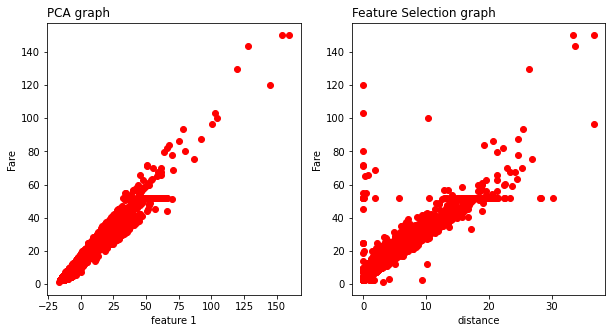

In [165]:
#comparison
pca = PCA(n_components=1)
fet = pca.fit_transform(df[["passengers", "distance", "tip", "tolls", "total"]])

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(fet[:, 0], df["fare"], color='red')
plt.title("PCA graph", loc="left")
plt.xlabel("feature 1")
plt.ylabel("Fare")

plt.subplot(1, 2, 2)
plt.scatter(df["distance"], df["fare"], color='red')
plt.title("Feature Selection graph", loc="left")
plt.xlabel("distance")
plt.ylabel("Fare")

plt.show()

first and obvious difference is that pca is a feauture conditioning method that transforms the dataset in the two-three(for visualising) of most varient (most variance/information) direction in order to reduce the dimension but feature selection is a method that relies on removing some features based on correlations with others. pca is more accurate because we despite feature selection we don't remove any data. on the other hand feature selection is more interpretable and easier to explain. on the graph above the better result of PCA is observed.

## Part3 - Using Figure

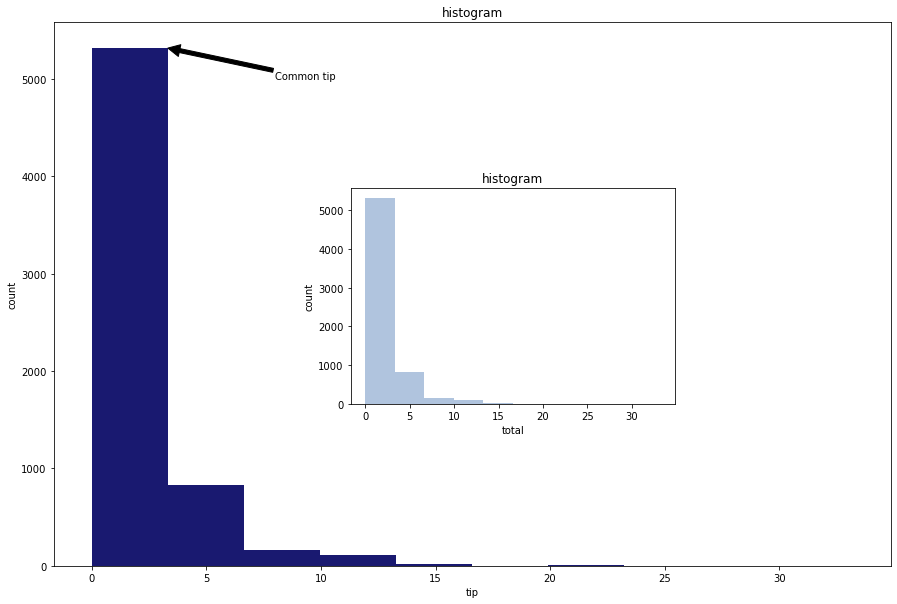

In [179]:
#Plot
fig = plt.figure(figsize=(15,10))
bars = plt.hist(df['tip'], color='midnightblue')
plt.title('histogram')
plt.ylabel('count')
plt.xlabel('tip')
plt.annotate('Common tip',xy=(bars[1][np.argmax(bars[0])+1], bars[0][np.argmax(bars[0])]),xytext=(8,5000),arrowprops=dict(color='black'))
ax = fig.add_axes([0.4, 0.35, 0.3, 0.3])
ax.hist(df['tip'], color='lightsteelblue')
ax.set_title('histogram')
ax.set_ylabel('count')
ax.set_xlabel('total')
plt.show()

for adding one plot inside the other one {add_axes}. 
for showing the most common tip {annotate}.